In [9]:
import pandas as pd
import os,sys
import matplotlib.pyplot as plt






In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [12]:
data=pd.read_csv("./data/raw_analyst_ratings.csv")

In [13]:
curr_dir=os.getcwd()
print(curr_dir)

c:\Users\david\Desktop\Week1\notebooks


In [14]:
parent=os.path.dirname(curr_dir)
print(parent)
sys.path.insert(0,parent)

c:\Users\david\Desktop\Week1


In [15]:
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [16]:
data.describe()

,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


In [17]:
data.shape

(1407328, 6)

In [18]:
data.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [20]:
sentiment_data=data.copy()

In [21]:
SIA=SentimentIntensityAnalyzer()

In [22]:
sentiment_data['sentiment'] = sentiment_data['headline'].apply(lambda x: SIA.polarity_scores(text=x)['compound'])

In [32]:
sentiment_data_copy=sentiment_data.copy()

In [23]:
sentiment_data.head()

,Unnamed: 0,headline,url,publisher,date,stock,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.000
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.000
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.000
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.000
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.296


In [24]:
sentiment_data

,Unnamed: 0,headline,url,publisher,date,stock,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.0000
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.0000
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.0000
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.0000
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.2960
...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,0.2023
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,-0.3818
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,0.0000
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,0.0000


In [25]:
sentiment_data["sentiment_cata"]=pd.cut(sentiment_data["sentiment"], bins=[ -1,-0.5,-0.0001,0.5,1], labels=["very negative", "negative", "nutral","postive"])

In [26]:
sentiment_data

,Unnamed: 0,headline,url,publisher,date,stock,sentiment,sentiment_cata
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.0000,nutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.0000,nutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.0000,nutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.0000,nutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.2960,nutral
...,...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,0.2023,nutral
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,-0.3818,negative
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,0.0000,nutral
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,0.0000,nutral


In [27]:
sentiment_data_count=sentiment_data["sentiment_cata"].value_counts()
sentiment_data_count

sentiment_cata
nutral           1070915
negative          182864
postive           109718
very negative      43831
Name: count, dtype: int64

In [28]:
sentiment_data_count_data=sentiment_data_count.reset_index()
sentiment_data_count_data.columns=["sentiment_cata","Count"]
sentiment_data_count_data.head()

,sentiment_cata,Count
0,nutral,1070915
1,negative,182864
2,postive,109718
3,very negative,43831


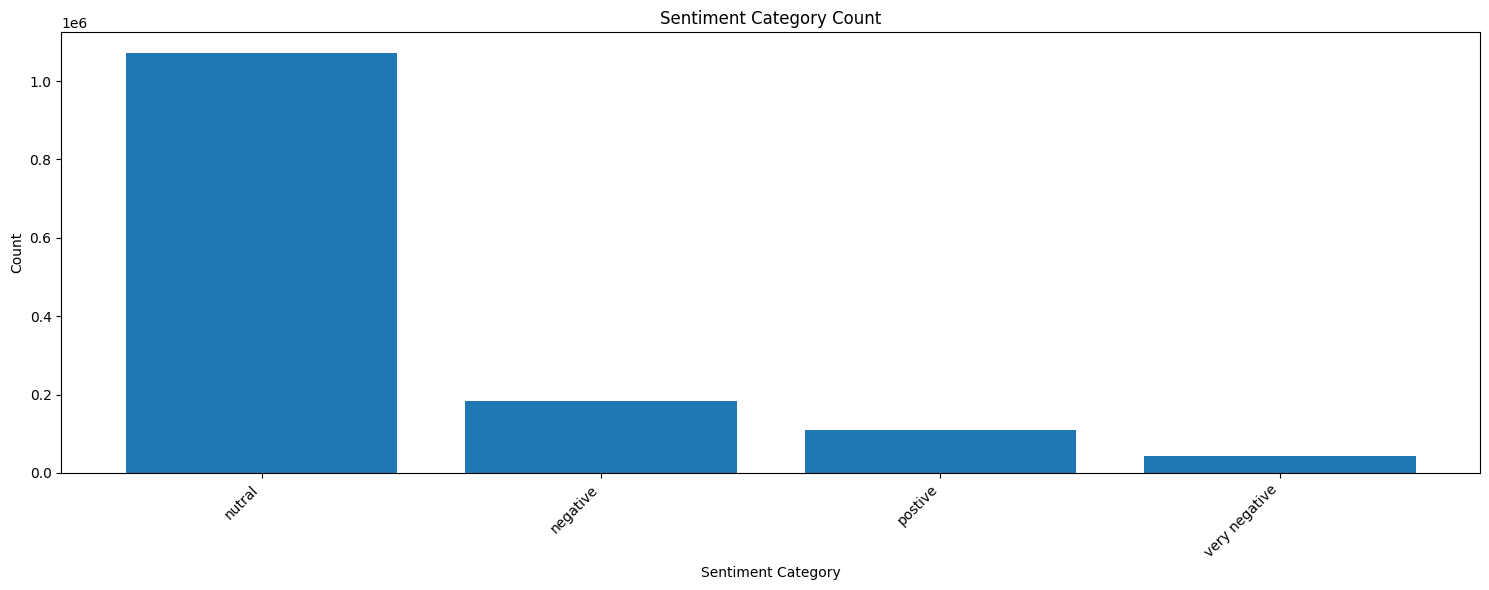

In [29]:
plt.figure(figsize=(15, 6))

plt.bar(sentiment_data_count_data["sentiment_cata"], sentiment_data_count_data["Count"])

plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.title("Sentiment Category Count")
plt.xticks(rotation=45, ha="right")


plt.tight_layout()  
plt.show()

In [30]:
sentiment_data.dtypes

Unnamed: 0           int64
headline            object
url                 object
publisher           object
date                object
stock               object
sentiment          float64
sentiment_cata    category
dtype: object

In [31]:
sentiment_data["date"]=pd.to_datetime(sentiment_data["date"], errors="coerce")


In [33]:
sentiment_data.set_index("date", inplace=True)

In [34]:
sentiment_data["date_format"] = sentiment_data.index.date

In [35]:
sentiment_data["year"] = sentiment_data.index.year
sentiment_data["month"] = sentiment_data.index.month
sentiment_data["day"] = sentiment_data.index.day
sentiment_data["WeekDay"] = sentiment_data.index.weekday
sentiment_data["Hour"] = sentiment_data.index.hour


In [36]:
sentiment_data["year_month"] = sentiment_data.index.to_period("M")

C:\Users\david\AppData\Local\Temp\ipykernel_2872\1027457892.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  sentiment_data["year_month"] = sentiment_data.index.to_period("M")


In [37]:
sentiment_data.head()

,Unnamed: 0,headline,url,publisher,stock,sentiment,sentiment_cata,date_format,year,month,day,WeekDay,Hour,year_month
date,,,,,,,,,,,,,,
2020-06-05 10:30:54-04:00,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,0.000,nutral,2020-06-05,2020.0,6.0,5.0,4.0,10.0,2020-06
2020-06-03 10:45:20-04:00,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,0.000,nutral,2020-06-03,2020.0,6.0,3.0,2.0,10.0,2020-06
2020-05-26 04:30:07-04:00,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,0.000,nutral,2020-05-26,2020.0,5.0,26.0,1.0,4.0,2020-05
2020-05-22 12:45:06-04:00,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,0.000,nutral,2020-05-22,2020.0,5.0,22.0,4.0,12.0,2020-05
2020-05-22 11:38:59-04:00,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,0.296,nutral,2020-05-22,2020.0,5.0,22.0,4.0,11.0,2020-05


In [38]:
year_sentiment_counts = sentiment_data.groupby(["year_month", "sentiment_cata"]).size().reset_index(name="count")
pivot_table_yealy = year_sentiment_counts.pivot(index="year_month", columns="sentiment_cata", values="count").fillna(0)

C:\Users\david\AppData\Local\Temp\ipykernel_2872\461572644.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_sentiment_counts = sentiment_data.groupby(["year_month", "sentiment_cata"]).size().reset_index(name="count")


In [39]:
pivot_table_yealy.head()

sentiment_cata,very negative,negative,nutral,postive
year_month,,,,
2011-04,0,0,5,1
2011-05,2,4,66,6
2011-06,4,9,76,7
2011-07,12,9,107,9
2011-08,5,18,113,13


In [40]:
pivot_table_yealy.index = pivot_table_yealy.index.astype(str)

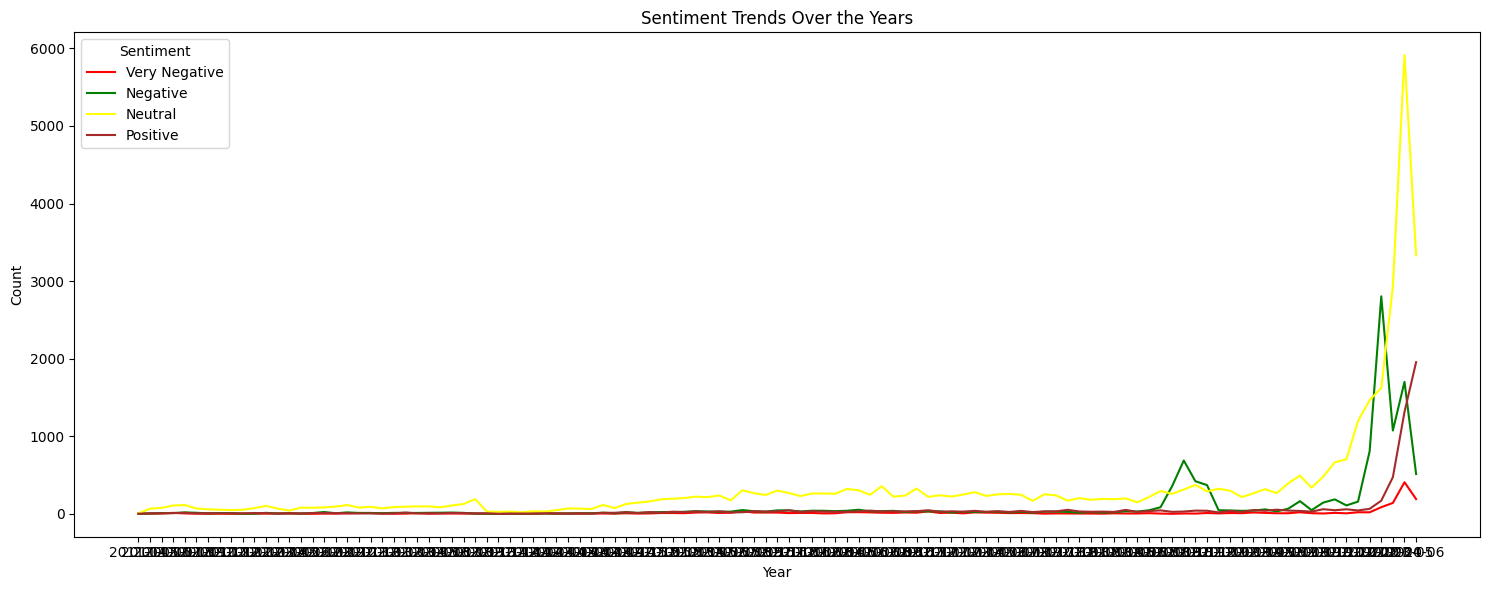

In [41]:
plt.figure(figsize=(15, 6))
plt.plot(pivot_table_yealy.index, pivot_table_yealy["very negative"], color="red", label="Very Negative")
plt.plot(pivot_table_yealy.index, pivot_table_yealy["negative"], color="green", label="Negative")
plt.plot(pivot_table_yealy.index, pivot_table_yealy["nutral"], color="yellow", label="Neutral")
plt.plot(pivot_table_yealy.index, pivot_table_yealy["postive"], color="brown", label="Positive")
plt.title("Sentiment Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Sentiment", loc="upper left")
plt.tight_layout()
plt.show()

In [42]:
yearly_sentiment_counts = sentiment_data.groupby(["year", "sentiment_cata"]).size().reset_index(name="count")
pivot_table_year = yearly_sentiment_counts.pivot(index="year", columns="sentiment_cata", values="count").fillna(0)


C:\Users\david\AppData\Local\Temp\ipykernel_2872\164370023.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_sentiment_counts = sentiment_data.groupby(["year", "sentiment_cata"]).size().reset_index(name="count")


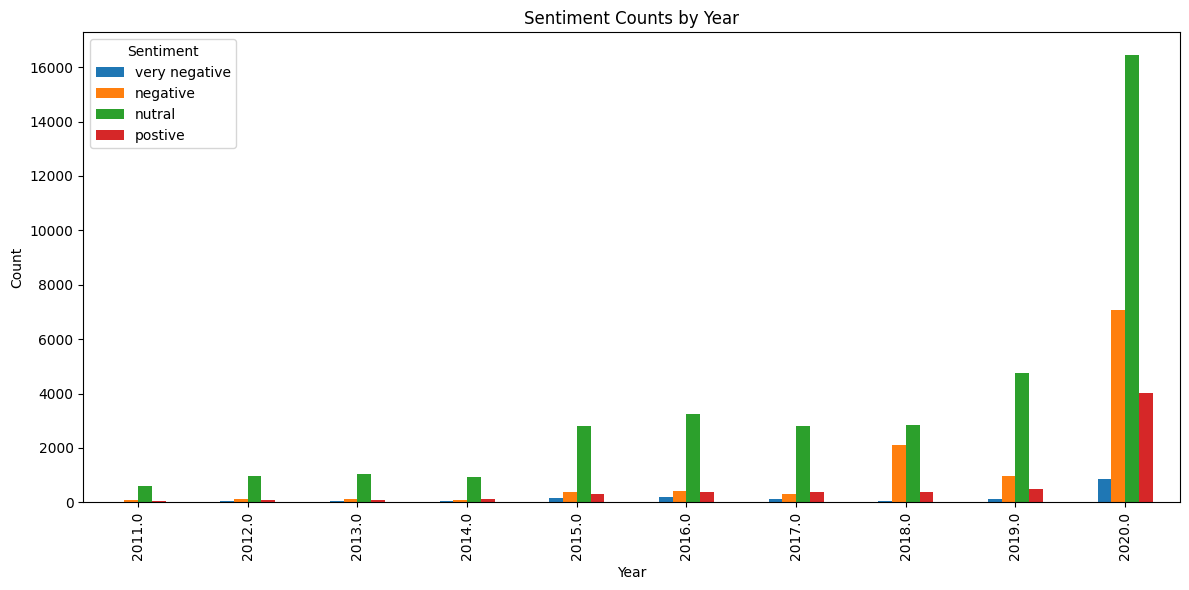

In [43]:
pivot_table_year.plot(kind='bar', figsize=(12, 6))
plt.title("Sentiment Counts by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


C:\Users\david\AppData\Local\Temp\ipykernel_2872\116528029.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sentiment_counts = sentiment_data.groupby(["month", "sentiment_cata"]).size().reset_index(name="count")


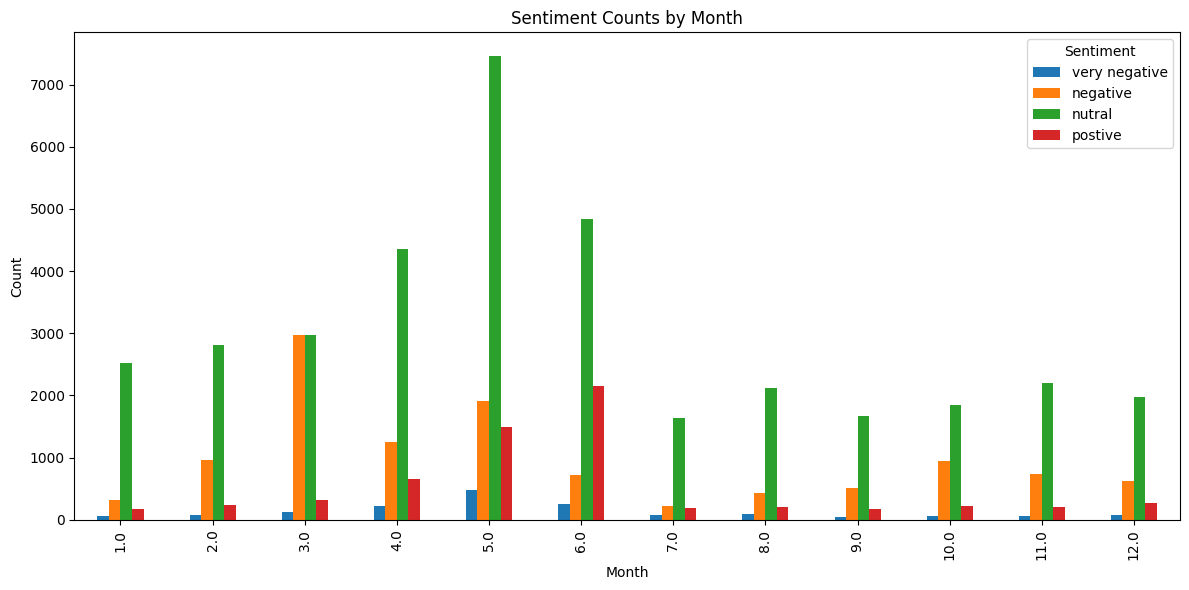

In [44]:
monthly_sentiment_counts = sentiment_data.groupby(["month", "sentiment_cata"]).size().reset_index(name="count")
pivot_table_month = monthly_sentiment_counts.pivot(index="month", columns="sentiment_cata", values="count").fillna(0)
pivot_table_month.plot(kind='bar', figsize=(12, 6))
plt.title("Sentiment Counts by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()



C:\Users\david\AppData\Local\Temp\ipykernel_2872\859490423.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_sentiment_counts = sentiment_data.groupby(["day", "sentiment_cata"]).size().reset_index(name="count")


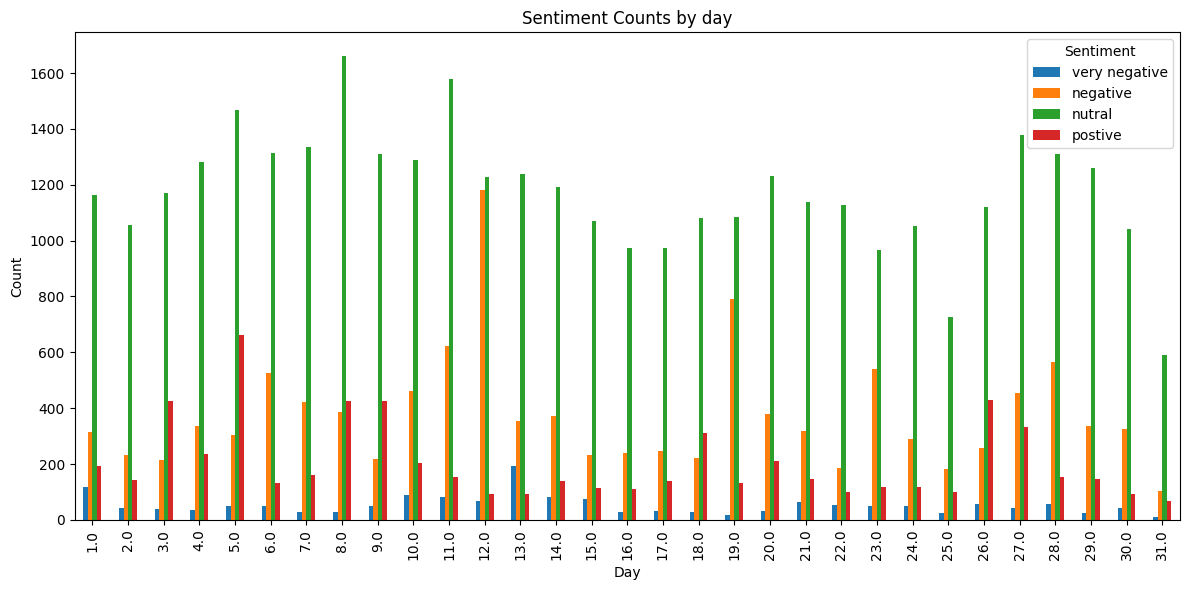

In [45]:
daily_sentiment_counts = sentiment_data.groupby(["day", "sentiment_cata"]).size().reset_index(name="count")
pivot_table_day = daily_sentiment_counts.pivot(index="day", columns="sentiment_cata", values="count").fillna(0)
pivot_table_day.plot(kind='bar', figsize=(12, 6))
plt.title("Sentiment Counts by day")
plt.xlabel("Day")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()



C:\Users\david\AppData\Local\Temp\ipykernel_2872\3553268379.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_sentiment_counts = sentiment_data.groupby(["Hour", "sentiment_cata"]).size().reset_index(name="count")


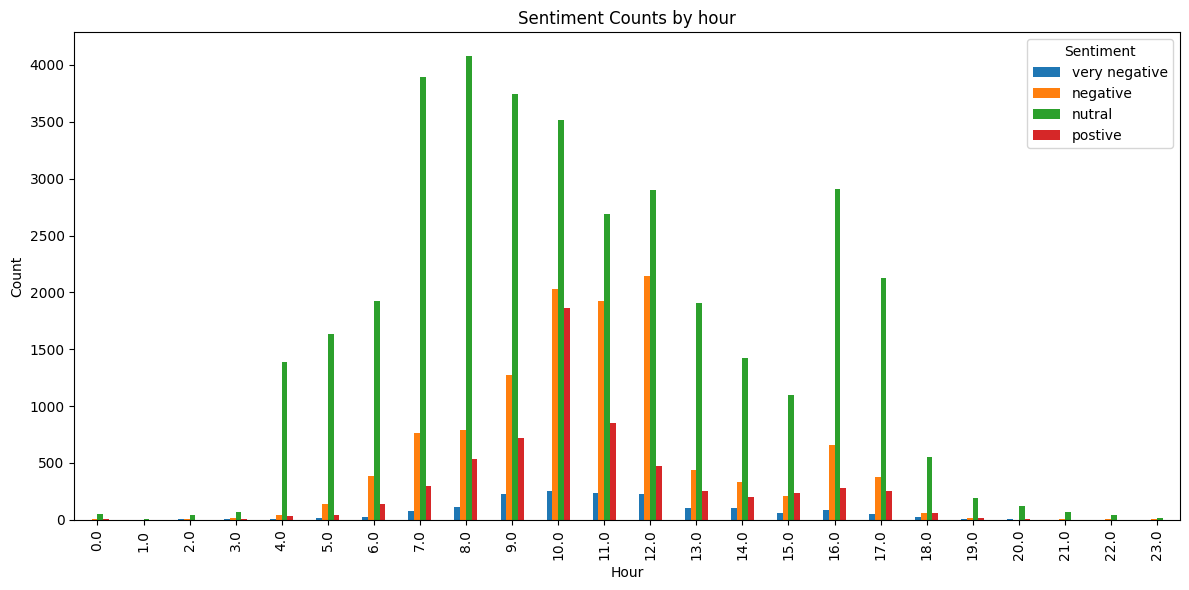

In [46]:
hourly_sentiment_counts = sentiment_data.groupby(["Hour", "sentiment_cata"]).size().reset_index(name="count")
pivot_table_hour = hourly_sentiment_counts.pivot(index="Hour", columns="sentiment_cata", values="count").fillna(0)
pivot_table_hour.plot(kind='bar', figsize=(12, 6))
plt.title("Sentiment Counts by hour")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


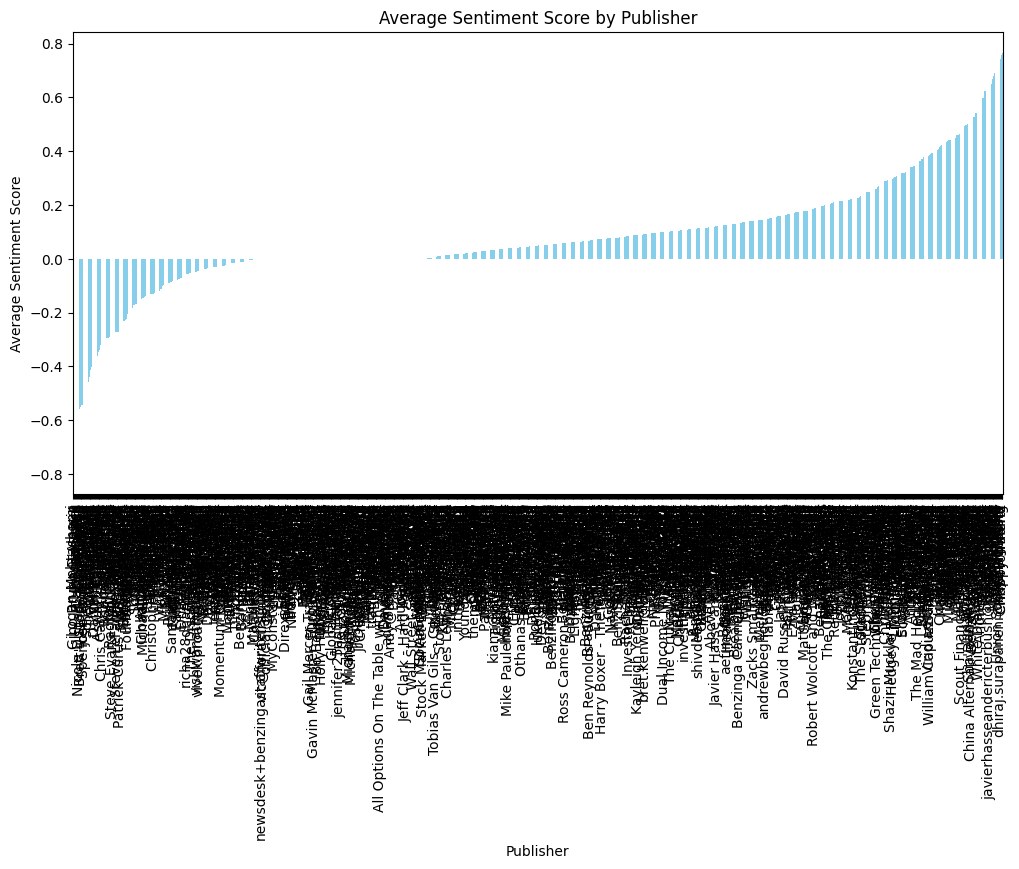

In [47]:
publisher_sentiment = sentiment_data.groupby('publisher')['sentiment'].mean().sort_values()

# Plot sentiment by publisher
publisher_sentiment.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Average Sentiment Score by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Average Sentiment Score')
plt.show()

C:\Users\david\AppData\Local\Temp\ipykernel_2872\2777653828.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sentiment = sentiment_data.resample('M')['sentiment'].mean()


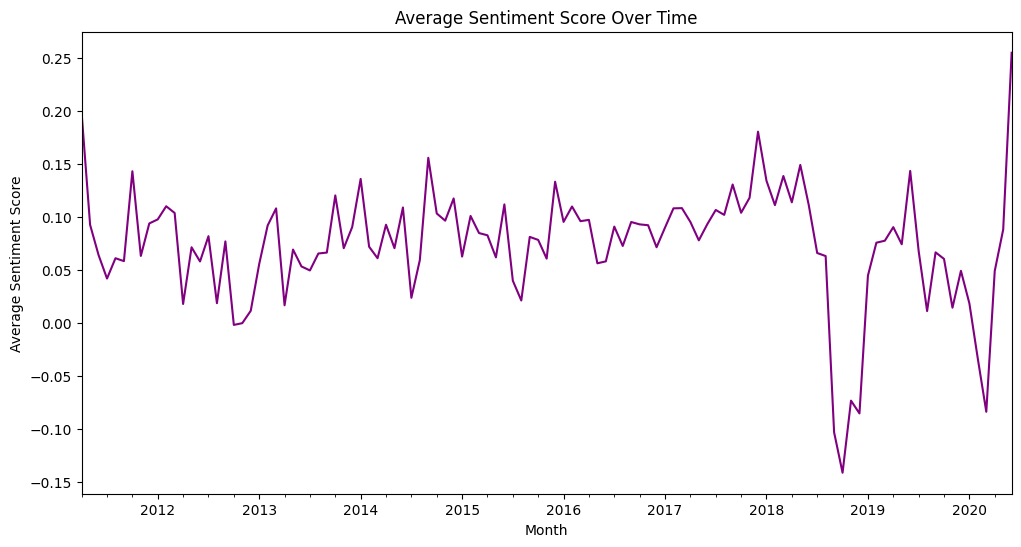

In [48]:
monthly_sentiment = sentiment_data.resample('M')['sentiment'].mean()

# Plot sentiment trend over time
monthly_sentiment.plot(figsize=(12, 6), color='purple')
plt.title('Average Sentiment Score Over Time')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.show()

C:\Users\david\AppData\Local\Temp\ipykernel_2872\2778869018.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sentiment = sentiment_data.resample('M')['sentiment'].mean()


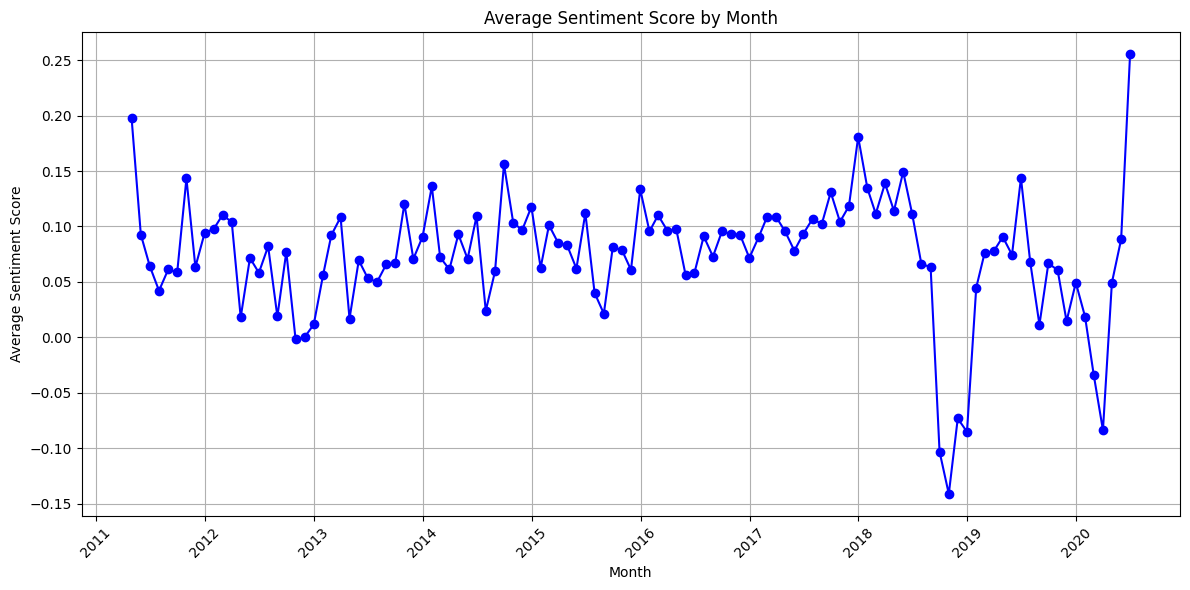

In [49]:
monthly_sentiment = sentiment_data.resample('M')['sentiment'].mean()

# Plot sentiment trend over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sentiment.index, monthly_sentiment.values, marker='o', linestyle='-', color='blue')
plt.title('Average Sentiment Score by Month')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\david\AppData\Local\Temp\ipykernel_2872\3064788017.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_length = sentiment_data.groupby('sentiment_cata')['length_of_heading'].mean()


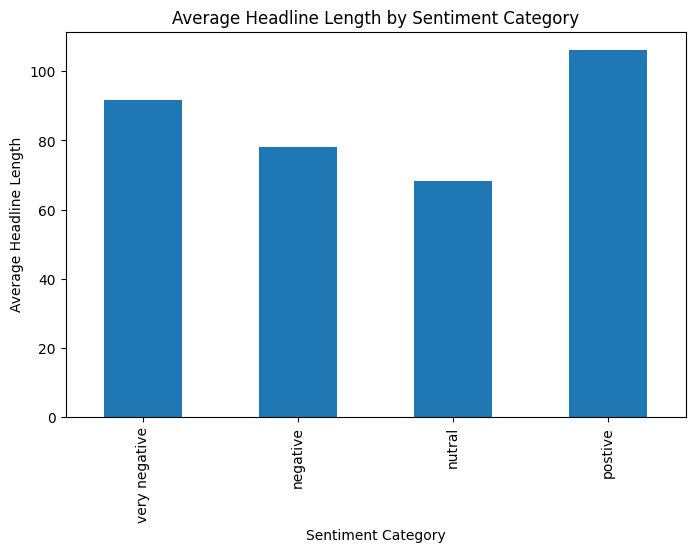

In [50]:
sentiment_data["length_of_heading"]=sentiment_data["headline"].apply(len)
sentiment_length = sentiment_data.groupby('sentiment_cata')['length_of_heading'].mean()

# Plot headline length by sentiment category
sentiment_length.plot(kind='bar', figsize=(8, 5))
plt.title('Average Headline Length by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Average Headline Length')
plt.show()

In [51]:
sentiment_data.head()

,Unnamed: 0,headline,url,publisher,stock,sentiment,sentiment_cata,date_format,year,month,day,WeekDay,Hour,year_month,length_of_heading
date,,,,,,,,,,,,,,,
2020-06-05 10:30:54-04:00,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,0.000,nutral,2020-06-05,2020.0,6.0,5.0,4.0,10.0,2020-06,39
2020-06-03 10:45:20-04:00,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,0.000,nutral,2020-06-03,2020.0,6.0,3.0,2.0,10.0,2020-06,42
2020-05-26 04:30:07-04:00,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,0.000,nutral,2020-05-26,2020.0,5.0,26.0,1.0,4.0,2020-05,29
2020-05-22 12:45:06-04:00,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,0.000,nutral,2020-05-22,2020.0,5.0,22.0,4.0,12.0,2020-05,44
2020-05-22 11:38:59-04:00,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,0.296,nutral,2020-05-22,2020.0,5.0,22.0,4.0,11.0,2020-05,87


In [52]:

data.isnull().sum()


Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [53]:
sentiment_data.reset_index()

,date,Unnamed: 0,headline,url,publisher,stock,sentiment,sentiment_cata,date_format,year,month,day,WeekDay,Hour,year_month,length_of_heading
0,2020-06-05 10:30:54-04:00,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,0.0000,nutral,2020-06-05,2020.0,6.0,5.0,4.0,10.0,2020-06,39
1,2020-06-03 10:45:20-04:00,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,0.0000,nutral,2020-06-03,2020.0,6.0,3.0,2.0,10.0,2020-06,42
2,2020-05-26 04:30:07-04:00,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,0.0000,nutral,2020-05-26,2020.0,5.0,26.0,1.0,4.0,2020-05,29
3,2020-05-22 12:45:06-04:00,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,0.0000,nutral,2020-05-22,2020.0,5.0,22.0,4.0,12.0,2020-05,44
4,2020-05-22 11:38:59-04:00,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,0.2960,nutral,2020-05-22,2020.0,5.0,22.0,4.0,11.0,2020-05,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407323,NaT,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,ZX,0.2023,nutral,NaT,NaN,NaN,NaN,NaN,NaN,NaT,38
1407324,NaT,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,ZX,-0.3818,negative,NaT,NaN,NaN,NaN,NaN,NaN,NaT,52
1407325,NaT,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,ZX,0.0000,nutral,NaT,NaN,NaN,NaN,NaN,NaN,NaT,56
1407326,NaT,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,ZX,0.0000,nutral,NaT,NaN,NaN,NaN,NaN,NaN,NaT,54


In [54]:
sentiment_data.dtypes

Unnamed: 0               int64
headline                object
url                     object
publisher               object
stock                   object
sentiment              float64
sentiment_cata        category
date_format             object
year                   float64
month                  float64
day                    float64
WeekDay                float64
Hour                   float64
year_month           period[M]
length_of_heading        int64
dtype: object

In [55]:
sentiment_data["data_format"]=sentiment_data.index.date

In [56]:
sentiment_data.head()

,Unnamed: 0,headline,url,publisher,stock,sentiment,sentiment_cata,date_format,year,month,day,WeekDay,Hour,year_month,length_of_heading,data_format
date,,,,,,,,,,,,,,,,
2020-06-05 10:30:54-04:00,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,0.000,nutral,2020-06-05,2020.0,6.0,5.0,4.0,10.0,2020-06,39,2020-06-05
2020-06-03 10:45:20-04:00,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,0.000,nutral,2020-06-03,2020.0,6.0,3.0,2.0,10.0,2020-06,42,2020-06-03
2020-05-26 04:30:07-04:00,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,0.000,nutral,2020-05-26,2020.0,5.0,26.0,1.0,4.0,2020-05,29,2020-05-26
2020-05-22 12:45:06-04:00,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,0.000,nutral,2020-05-22,2020.0,5.0,22.0,4.0,12.0,2020-05,44,2020-05-22
2020-05-22 11:38:59-04:00,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,0.296,nutral,2020-05-22,2020.0,5.0,22.0,4.0,11.0,2020-05,87,2020-05-22


In [57]:
sentiment_data.set_index("data_format", inplace=True)

In [58]:
sentiment_data["sentiment_cata"].unique()

['nutral', 'negative', 'postive', 'very negative']
Categories (4, object): ['very negative' < 'negative' < 'nutral' < 'postive']

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

ModuleNotFoundError: No module named 'sklearn'

In [65]:
def clean_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply text cleaning
sentiment_data['cleaned_text'] =sentiment_data['headline'].apply(clean_text)

In [2]:
import re
from rake_nltk import Rake
r=Rake()


In [71]:
sentiment_data['cleaned_text']=sentiment_data['cleaned_text'].astype(str)

In [72]:
def extract_keywords(text):
    r.extract_keywords_from_text(text)
    return r.get_ranked_phrases()


sentiment_data['keywords'] = sentiment_data['cleaned_text'].apply(extract_keywords)
sentiment_data.head()

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\david/nltk_data'
    - 'c:\\Python312\\nltk_data'
    - 'c:\\Python312\\share\\nltk_data'
    - 'c:\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\david\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [3]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
nltk.download('popular')


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\david\AppData\Roaming\nl

KeyboardInterrupt: 

In [76]:
data1 = {
    'cleaned_text': [
        "FDA approval for a new drug was announced today.",
        "Stock prices dropped significantly after the report.",
        "Company announced a new partnership with a tech firm."
    ]
}

sentiment_data1 = pd.DataFrame(data1)

# Initialize RAKE
r = Rake()

# Define the keyword extraction function
def extract_keywords(text):
    if pd.isnull(text) or text.strip() == "":
        return []  # Return an empty list for empty or null text
    r.extract_keywords_from_text(text)
    return r.get_ranked_phrases()

# Apply the function
sentiment_data1['keywords'] = sentiment_data1['cleaned_text'].apply(extract_keywords)

# Display the result
print(sentiment_data1)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\david/nltk_data'
    - 'c:\\Python312\\nltk_data'
    - 'c:\\Python312\\share\\nltk_data'
    - 'c:\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\david\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [4]:
import nltk
nltk.download('punkt')  # Download the punkt tokenizer data


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [78]:
def extract_keywords(text):
    if pd.isnull(text) or text.strip() == "":
        return []  # Return an empty list for empty or null text
    r.extract_keywords_from_text(text)
    return r.get_ranked_phrases()

# Apply the function
sentiment_data['keywords'] = sentiment_data['cleaned_text'].apply(extract_keywords)

# Display the result
print(sentiment_data['keywords'])

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\david/nltk_data'
    - 'c:\\Python312\\nltk_data'
    - 'c:\\Python312\\share\\nltk_data'
    - 'c:\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\david\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [34]:
Apple_data=sentiment_data[sentiment_data["stock"]=="AAPL"]

In [35]:
Apple_data

,Unnamed: 0,headline,url,publisher,date,stock,sentiment,sentiment_cata
6680,7120,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10 11:33:26-04:00,AAPL,0.5574,postive
6681,7121,10 Biggest Price Target Changes For Wednesday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-06-10 08:14:08-04:00,AAPL,0.0000,nutral
6682,7122,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10 07:53:47-04:00,AAPL,0.2023,nutral
6683,7123,"Deutsche Bank Maintains Buy on Apple, Raises P...",https://www.benzinga.com/news/20/06/16219873/d...,Benzinga Newsdesk,2020-06-10 07:19:25-04:00,AAPL,0.0000,nutral
6684,7124,Apple To Let Users Trade In Their Mac Computer...,https://www.benzinga.com/news/20/06/16218697/a...,Neer Varshney,2020-06-10 06:27:11-04:00,AAPL,0.3818,nutral
...,...,...,...,...,...,...,...,...
7116,7585,"UBS Maintains Buy on Apple, Lowers Price Targe...",https://www.benzinga.com/news/20/03/15514989/u...,Vick Meyer,2020-03-10 00:00:00,AAPL,-0.1280,negative
7117,7586,123 Biggest Movers From Yesterday,https://www.benzinga.com/news/20/03/15514298/1...,Lisa Levin,2020-03-10 00:00:00,AAPL,0.0000,nutral
7118,7587,Crude Awakening: Energy Sector Takes A 20% Spi...,https://www.benzinga.com/news/earnings/20/03/1...,JJ Kinahan,2020-03-09 00:00:00,AAPL,-0.9062,very negative
7119,7588,Investor Movement Index Summary: February 2020,https://www.benzinga.com/news/earnings/20/03/1...,TD Ameritrade,2020-03-09 00:00:00,AAPL,0.0000,nutral


In [36]:
Apple_data["sentiment_cata"].value_counts()

sentiment_cata
nutral           298
negative          74
postive           43
very negative     26
Name: count, dtype: int64

In [38]:

start_date=sentiment_data["date"].min()
end_date=sentiment_data["date"].max()
print("start date",start_date)
print("End date", end_date)

start date 2009-02-14 00:00:00
End date 2020-06-11 17:12:35-04:00


In [60]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
print(nltk.data.path)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


['C:\\Users\\user/nltk_data', 'c:\\Users\\user\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data', 'c:\\Users\\user\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data', 'c:\\Users\\user\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data', 'C:\\Users\\user\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [67]:

from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
print(nltk.data.find('tokenizers/punkt'))

C:\Users\user\AppData\Roaming\nltk_data\tokenizers\punkt


In [70]:
from rake_nltk import Rake



In [6]:
r=Rake()
test_text = "This is a test. This is only a test."
r.extract_keywords_from_text(test_text)
print(r.get_ranked_phrases_with_scores())

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\david/nltk_data'
    - 'c:\\Python312\\nltk_data'
    - 'c:\\Python312\\share\\nltk_data'
    - 'c:\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\david\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [2]:
from gensim.summarization import keywords

text = "FDA approval for a new drug was announced today. Stock prices dropped significantly after the report."
key_words = keywords(text).split('\n')
print(key_words)


ModuleNotFoundError: No module named 'gensim'

In [88]:
data['headline'] = data['headline'].astype(str)

In [89]:
print(data['headline'].dtype)

object
